## Important links

1. https://moonbooks.org/Articles/How-to-put-the-origin-in-the-center-of-the-figure-with-matplotlib-/
2. https://stackoverflow.com/questions/19677963/matplotlib-keep-grid-lines-behind-the-graph-but-the-y-and-x-axis-above
3. https://stackoverflow.com/questions/34025306/how-to-use-matplotlib-quiver-scale
4. https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
ls

dataloaders.ipynb      lorentz_attractor.mp4  src/


In [3]:
from src import data_io, hyperparams, main, model, ops, utils

In [4]:
data_io.DataGenerator?

Init signature:
data_io.DataGenerator(
    num_interval: int = 1000,
    min: int = 0,
    max: int = 1,
    shape: str = 'square',
)
Docstring:      <no docstring>
Init docstring:
Args:
    num_interval : number of interval steps to take
    min : minimum length of the playground
    max : maximum length of the playground
    shape : shape of the playground
Returns:
    ....
File:           ~/Google Drive/MS@NCState/research@NCState/research@tianfu_wu/GridTr/AOGTransformer/GridTr/src/data_io.py
Type:           type
Subclasses:     


In [5]:
utils.generate_velocity_list??

Signature:
utils.generate_velocity_list(
    max_velocity: float,
    min_velocity: float = 0,
    interval: float = 1,
    verbose: bool = True,
) -> list
Source:   
def generate_velocity_list(
    max_velocity: float,
    min_velocity: float = 0,
    interval: float = 1,
    verbose: bool = True,
) -> list:
    """## VERIFIED 🎯🎯
    Args:
        max_velocity : maximum velocity in the experiment
        min_velocity : minimum velocity in the experiment
        interval : step of unit motion
        verbose : If True, then plot all the velocities in the generated velocity list.

    Returns:
        [a list of possible motion velocities]
    """
    velocity_list = []
    ## converting max velocity to integer
    max_velocity_int = int(np.ceil(max_velocity) + 1)
    ## sampling the unit-motion in x-direction
    for i in np.arange(0, max_velocity_int, interval):
        ## sampling the unit-motion in y-direction
        for j in np.arange(0, max_velocity_int, interval):
            sp

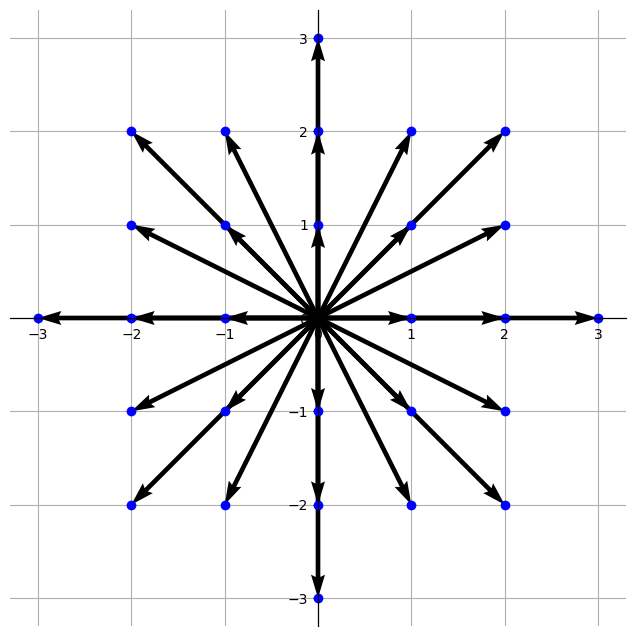

(28, 2)

In [6]:
x = utils.generate_velocity_list(3, 0, 1)
x.shape

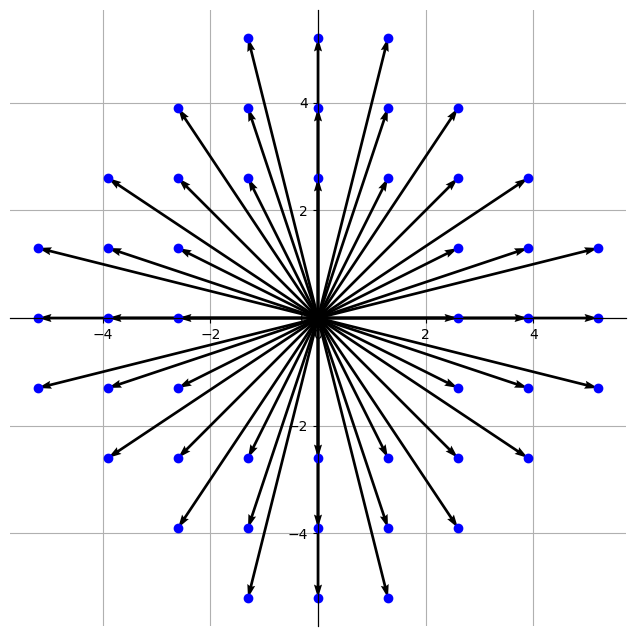

(48, 2)

In [7]:
x = utils.generate_velocity_list(5.4, 2.5, 1.3)
x.shape

In [8]:
import numpy as np

In [9]:
np.meshgrid?

Signature: np.meshgrid(*xi, copy=True, sparse=False, indexing='xy')
Docstring:
Return coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of
N-D scalar/vector fields over N-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.

.. versionchanged:: 1.9
   1-D and 0-D cases are allowed.

Parameters
----------
x1, x2,..., xn : array_like
    1-D arrays representing the coordinates of a grid.
indexing : {'xy', 'ij'}, optional
    Cartesian ('xy', default) or matrix ('ij') indexing of output.
    See Notes for more details.

    .. versionadded:: 1.7.0
sparse : bool, optional
    If True a sparse grid is returned in order to conserve memory.
    Default is False.

    .. versionadded:: 1.7.0
copy : bool, optional
    If False, a view into the original arrays are returned in order to
    conserve memory.  Default is True.  Please note that
    ``sparse=False, copy=False`` will likely return non-contiguous
    arrays.  Furthermore, mo

In [10]:
from PIL import Image

In [11]:
utils.shape_mask?

Signature:
utils.shape_mask(
    size: int = 80,
    shape: str = 'square',
    verbose: bool = True,
)
Docstring:
## VERIFIED 🎯🎯
Args:
    size : size of the playground
    shape : dimensions of the playground (eg.: square, rect, circle, triangle....etc)
    verbose : whether to show the plot of the mask or not

Returns:
    [a numpy.ndarray of bools]
File:      ~/Google Drive/MS@NCState/research@NCState/research@tianfu_wu/GridTr/AOGTransformer/GridTr/src/utils.py
Type:      function


In [12]:
x = utils.shape_mask(size=200, shape="circle")

In [13]:
x.shape, type(x)

((200, 200), numpy.ndarray)

In [14]:
x.dtype

dtype('bool')

In [15]:
0+x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x)

In [17]:
data_io.DataGenerator??

Init signature:
data_io.DataGenerator(
    num_interval: int = 1000,
    min: int = 0,
    max: int = 1,
    shape: str = 'square',
)
Docstring:      <no docstring>
Source:        
class DataGenerator:
    def __init__(
        self,
        num_interval: int = 1000,
        min: int = 0,
        max: int = 1,
        shape: str = "square",
    ):
        """
        Args:
            num_interval : number of interval steps to take
            min : minimum length of the playground
            max : maximum length of the playground
            shape : shape of the playground
        Returns:
            ....
        """
        self.num_interval = num_interval
        self.min = min
        self.max = max
        self.shape = shape
        self.len_interval = (self.max - self.min) / (self.num_interval - 1)

    def generate(
        self,
        num_data: int = 30000,
        max_velocity: float = 3,
        min_velocity: float = 0,
        num_steps: int = 1,
        dtype: int = 2,


In [18]:
d=data_io.DataGenerator()

In [19]:
y = d.gen_2D_multi_dtype1(num_data=10)

In [20]:
y

{'mu_before': array([[480.13519101, 280.977366  ],
        [592.45486703, 637.5518623 ],
        [745.28471341, 394.72157665],
        [915.71914033, 537.45824418],
        [945.25548369,  99.649555  ],
        [239.05265334, 635.50942224],
        [586.77241366, 591.82045424],
        [328.31525567,  34.93030244],
        [359.82805829,  26.52212151],
        [711.34447412,  72.80656686]]),
 'mu_after': array([[261.65009358,  56.61596165],
        [529.04852502,  85.12269595],
        [423.45733423, 883.58135965],
        [166.16484952, 594.71200537],
        [453.72551535, 592.55533383],
        [173.77569421, 316.80599493],
        [ 38.68721263, 336.99740623],
        [607.57873978, 989.45936657],
        [407.40091719, 822.92795408],
        [359.40118518, 412.59588394]]),
 'velocity': array([0.31348081, 0.55661268, 0.58586935, 0.75249023, 0.69679867,
        0.32564542, 0.60503218, 0.99553756, 0.79862406, 0.48969401])}

In [21]:
a = y["mu_after"]
b = y["mu_before"]

In [22]:
a

array([[261.65009358,  56.61596165],
       [529.04852502,  85.12269595],
       [423.45733423, 883.58135965],
       [166.16484952, 594.71200537],
       [453.72551535, 592.55533383],
       [173.77569421, 316.80599493],
       [ 38.68721263, 336.99740623],
       [607.57873978, 989.45936657],
       [407.40091719, 822.92795408],
       [359.40118518, 412.59588394]])

In [23]:
b

array([[480.13519101, 280.977366  ],
       [592.45486703, 637.5518623 ],
       [745.28471341, 394.72157665],
       [915.71914033, 537.45824418],
       [945.25548369,  99.649555  ],
       [239.05265334, 635.50942224],
       [586.77241366, 591.82045424],
       [328.31525567,  34.93030244],
       [359.82805829,  26.52212151],
       [711.34447412,  72.80656686]])

In [24]:
x = np.sqrt(np.sum(np.square(a-b), axis=1))
x

array([313.16733156, 556.05606555, 585.28347783, 751.73773887,
       696.10187227, 325.31977495, 604.42714481, 994.54201913,
       797.82543645, 489.20431174])

In [25]:
d.gen_2D_multi_dtype2??

Signature:
d.gen_2D_multi_dtype2(
    num_data: int,
    max_velocity: float,
    min_velocity: float,
    num_steps: int,
    test: bool,
    visualize: bool,
    motion_type: str,
)
Source:   
    def gen_2D_multi_dtype2(
        self,
        num_data: int,
        max_velocity: float,
        min_velocity: float,
        num_steps: int,
        test: bool,
        visualize: bool,
        motion_type: str,
    ):
        """## VERIFIED 🎯🎯
        Samples discretized motions and their corresponding place pairs
        Args:
            num_data :
            max_velocity :
            min_velocity :
            num_steps :
            test :
            visualize :
            motion_type :

        Raises: NotImplementedError
        Returns:
            place_pair : a dict of before and after positions (mu) and velcities & its indices
        """

        velocity_idx = None
        if not test and motion_type == "discrete":
            velocity = utils.generate_velocity_list(
   

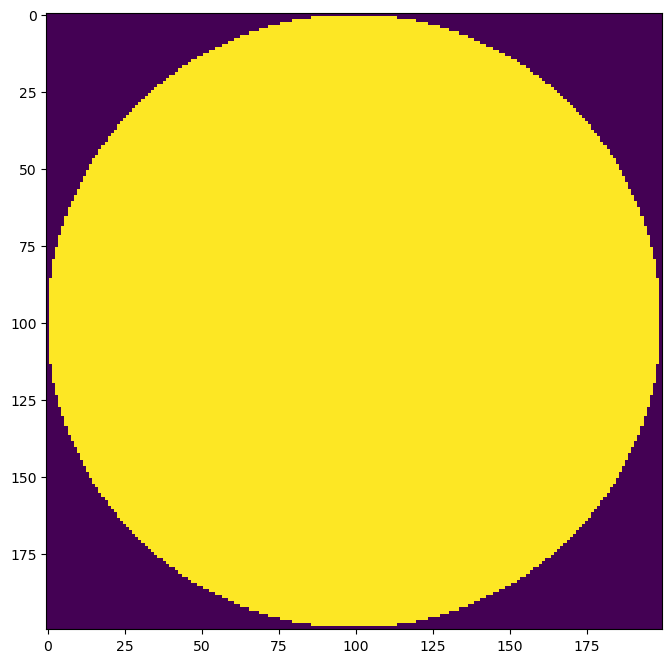

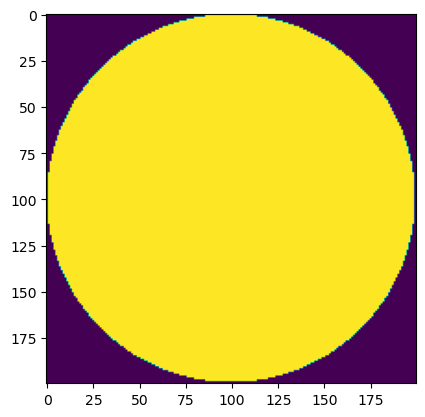

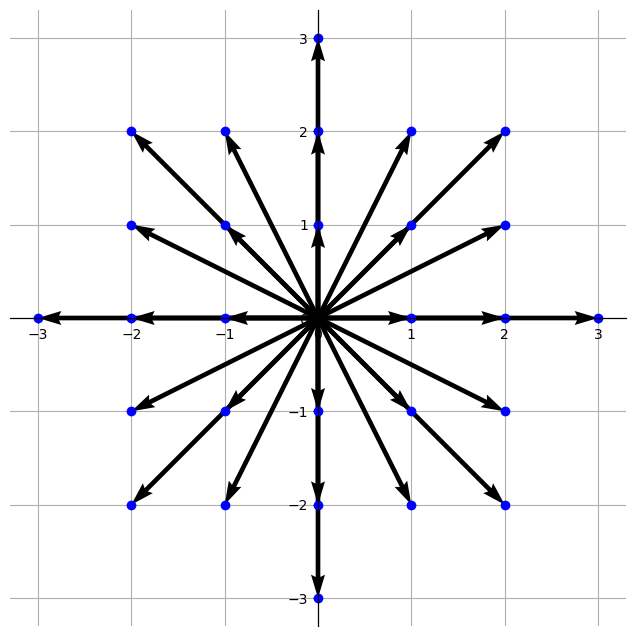

velocity.shape = (28, 2)
velocity_idx.shape = (30, 3)
velocity_grid.shape = (30, 3, 2)


{'mu_sequence': array([[[192.47527012, 585.36468335],
         [191.47527012, 587.36468335],
         [191.47527012, 588.36468335],
         [193.47527012, 589.36468335]],
 
        [[546.20131479, 796.29199484],
         [548.20131479, 797.29199484],
         [549.20131479, 796.29199484],
         [547.20131479, 794.29199484]],
 
        [[902.46210046, 903.19894402],
         [904.46210046, 901.19894402],
         [902.46210046, 902.19894402],
         [900.46210046, 903.19894402]],
 
        [[864.48369192, 145.05729909],
         [866.48369192, 146.05729909],
         [864.48369192, 145.05729909],
         [866.48369192, 145.05729909]],
 
        [[629.16424918, 430.54304744],
         [629.16424918, 428.54304744],
         [629.16424918, 426.54304744],
         [630.16424918, 427.54304744]],
 
        [[ 96.86070712, 684.30132152],
         [ 96.86070712, 687.30132152],
         [ 94.86070712, 687.30132152],
         [ 96.86070712, 688.30132152]],
 
        [[483.15370969, 716.670

In [26]:
y = d.gen_2D_multi_dtype2(30, 3, 0, 3, False, False, "discrete")
y

In [27]:
y[2].shape

KeyError: 2

In [28]:
np.cumsum?

Signature: np.cumsum(a, axis=None, dtype=None, out=None)
Docstring:
Return the cumulative sum of the elements along a given axis.

Parameters
----------
a : array_like
    Input array.
axis : int, optional
    Axis along which the cumulative sum is computed. The default
    (None) is to compute the cumsum over the flattened array.
dtype : dtype, optional
    Type of the returned array and of the accumulator in which the
    elements are summed.  If `dtype` is not specified, it defaults
    to the dtype of `a`, unless `a` has an integer dtype with a
    precision less than that of the default platform integer.  In
    that case, the default platform integer is used.
out : ndarray, optional
    Alternative output array in which to place the result. It must
    have the same shape and buffer length as the expected output
    but the type will be cast if necessary. See `ufuncs-output-type` for
    more details.

Returns
-------
cumsum_along_axis : ndarray.
    A new array holding the resul

In [29]:
a = np.array([[1,2,3], [4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
np.cumsum(a)

array([ 1,  3,  6, 10, 15, 21])

In [31]:
np.cumsum(a, axis=-2)

array([[1, 2, 3],
       [5, 7, 9]])

In [32]:
y[2][:4]

KeyError: 2

In [33]:
np.cumsum(y[2][:4], axis=1)

KeyError: 2

In [34]:
np.min(y[2][:4], axis=1)

KeyError: 2

In [35]:
np.fmin(-1.5, 
        np.min(y[2][:4], axis=1),
       )

KeyError: 2

In [36]:
np.expand_dims?

Signature: np.expand_dims(a, axis)
Docstring:
Expand the shape of an array.

Insert a new axis that will appear at the `axis` position in the expanded
array shape.

Parameters
----------
a : array_like
    Input array.
axis : int or tuple of ints
    Position in the expanded axes where the new axis (or axes) is placed.

    .. deprecated:: 1.13.0
        Passing an axis where ``axis > a.ndim`` will be treated as
        ``axis == a.ndim``, and passing ``axis < -a.ndim - 1`` will
        be treated as ``axis == 0``. This behavior is deprecated.

    .. versionchanged:: 1.18.0
        A tuple of axes is now supported.  Out of range axes as
        described above are now forbidden and raise an `AxisError`.

Returns
-------
result : ndarray
    View of `a` with the number of dimensions increased.

See Also
--------
squeeze : The inverse operation, removing singleton dimensions
reshape : Insert, remove, and combine dimensions, and resize existing ones
doc.indexing, atleast_1d, atleast_2d, 

In [37]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
a.shape

(2, 3)

In [39]:
np.expand_dims(a, axis=(0,-1))

array([[[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]]]])

In [40]:
y[2][:4]

KeyError: 2

In [41]:
np.concatenate((y[2][:2], y[2][2:4]), axis=1)

KeyError: 2

In [42]:
np.fmin?

Call signature:  np.fmin(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'fmin'>
File:            ~/anaconda3/lib/python3.7/site-packages/numpy/__init__.py
Docstring:      
fmin(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Element-wise minimum of array elements.

Compare two arrays and returns a new array containing the element-wise
minima. If one of the elements being compared is a NaN, then the
non-nan element is returned. If both elements are NaNs then the first
is returned.  The latter distinction is important for complex NaNs,
which are defined as at least one of the real or imaginary parts being
a NaN. The net effect is that NaNs are ignored when possible.

Parameters
----------
x1, x2 : array_like
    The arrays holding the elements to be compared.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).
out : ndarray, None, or tu

In [43]:
np.random.choice?

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the ``choice`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if a were np.arange(a)
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given the sample assumes a uniform distribution over all
    entries in a.

Returns
-------
samples : single item or ndarray
    The generated random sampl

In [44]:
a = np.diag((1,2,3,4,5,6))
a

array([[1, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 6]])

In [45]:
a*10

array([[10,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  0,  0, 60]])

In [46]:
np.random.choice?

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the ``choice`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if a were np.arange(a)
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given the sample assumes a uniform distribution over all
    entries in a.

Returns
-------
samples : single item or ndarray
    The generated random sampl

In [47]:
a

array([[1, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 6]])

In [48]:
import itertools

In [49]:
itertools.product?

Init signature: itertools.product(self, /, *args, **kwargs)
Docstring:     
product(*iterables, repeat=1) --> product object

Cartesian product of input iterables.  Equivalent to nested for-loops.

For example, product(A, B) returns the same as:  ((x,y) for x in A for y in B).
The leftmost iterators are in the outermost for-loop, so the output tuples
cycle in a manner similar to an odometer (with the rightmost element changing
on every iteration).

To compute the product of an iterable with itself, specify the number
of repetitions with the optional repeat keyword argument. For example,
product(A, repeat=4) means the same as product(A, A, A, A).

product('ab', range(3)) --> ('a',0) ('a',1) ('a',2) ('b',0) ('b',1) ('b',2)
product((0,1), (0,1), (0,1)) --> (0,0,0) (0,0,1) (0,1,0) (0,1,1) (1,0,0) ...
Type:           type
Subclasses:     


In [50]:
len(list(itertools.product(range(4), repeat=10))) == 4**10

True

In [51]:
4**10

1048576

In [52]:
idx = np.random.choice(6, 3)

In [53]:
idx

array([5, 2, 4])

In [54]:
a

array([[1, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 6]])

In [55]:
a[idx]

array([[0, 0, 0, 0, 0, 6],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 5, 0]])

In [56]:
np.tile?

Signature: np.tile(A, reps)
Docstring:
Construct an array by repeating A the number of times given by reps.

If `reps` has length ``d``, the result will have dimension of
``max(d, A.ndim)``.

If ``A.ndim < d``, `A` is promoted to be d-dimensional by prepending new
axes. So a shape (3,) array is promoted to (1, 3) for 2-D replication,
or shape (1, 1, 3) for 3-D replication. If this is not the desired
behavior, promote `A` to d-dimensions manually before calling this
function.

If ``A.ndim > d``, `reps` is promoted to `A`.ndim by pre-pending 1's to it.
Thus for an `A` of shape (2, 3, 4, 5), a `reps` of (2, 2) is treated as
(1, 1, 2, 2).

Note : Although tile may be used for broadcasting, it is strongly
recommended to use numpy's broadcasting operations and functions.

Parameters
----------
A : array_like
    The input array.
reps : array_like
    The number of repetitions of `A` along each axis.

Returns
-------
c : ndarray
    The tiled output array.

See Also
--------
repeat : Repeat e

In [57]:
c = np.array([[1,2,3,4],[50,60,70,80]])
print(c.shape)
np.tile(c, (5,1))

(2, 4)


array([[ 1,  2,  3,  4],
       [50, 60, 70, 80],
       [ 1,  2,  3,  4],
       [50, 60, 70, 80],
       [ 1,  2,  3,  4],
       [50, 60, 70, 80],
       [ 1,  2,  3,  4],
       [50, 60, 70, 80],
       [ 1,  2,  3,  4],
       [50, 60, 70, 80]])

In [58]:
c = np.array([1,2,3,4])
print(c.shape)
np.tile(c[:,None], (4,1))

(4,)


array([[1],
       [2],
       [3],
       [4],
       [1],
       [2],
       [3],
       [4],
       [1],
       [2],
       [3],
       [4],
       [1],
       [2],
       [3],
       [4]])

In [59]:
c.shape

(4,)

In [60]:
c[:,None].shape

(4, 1)

In [61]:
c[None].shape

(1, 4)

In [62]:
2**5

32

In [63]:
np.vstack?

Signature: np.vstack(tup)
Docstring:
Stack arrays in sequence vertically (row wise).

This is equivalent to concatenation along the first axis after 1-D arrays
of shape `(N,)` have been reshaped to `(1,N)`. Rebuilds arrays divided by
`vsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

Parameters
----------
tup : sequence of ndarrays
    The arrays must have the same shape along all but the first axis.
    1-D arrays must have the same length.

Returns
-------
stacked : ndarray
    The array formed by stacking the given arrays, will be at least 2-D.

See Also
--------
concatenate : Join a sequence of arrays along an existing axis.
stack : Join a sequence of arrays along a new axis.
block : Assemble an nd-array from nested lists of blocks.
hstac

In [64]:
a = np.zeros(shape=(2,3,4))
b = np.ones(shape=(5,3,4))

c = np.vstack((a,b))
c.shape

(7, 3, 4)

In [65]:
c

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [66]:
np.random.shuffle(c)

In [67]:
c

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [68]:
np.take?

Signature: np.take(a, indices, axis=None, out=None, mode='raise')
Docstring:
Take elements from an array along an axis.

When axis is not None, this function does the same thing as "fancy"
indexing (indexing arrays using arrays); however, it can be easier to use
if you need elements along a given axis. A call such as
``np.take(arr, indices, axis=3)`` is equivalent to
``arr[:,:,:,indices,...]``.

Explained without fancy indexing, this is equivalent to the following use
of `ndindex`, which sets each of ``ii``, ``jj``, and ``kk`` to a tuple of
indices::

    Ni, Nk = a.shape[:axis], a.shape[axis+1:]
    Nj = indices.shape
    for ii in ndindex(Ni):
        for jj in ndindex(Nj):
            for kk in ndindex(Nk):
                out[ii + jj + kk] = a[ii + (indices[jj],) + kk]

Parameters
----------
a : array_like (Ni..., M, Nk...)
    The source array.
indices : array_like (Nj...)
    The indices of the values to extract.

    .. versionadded:: 1.8.0

    Also allow scalars for indices.
a

In [69]:
a = [4, 3, 5, 7, 6, 8]
idxs = [0,1,4]

In [70]:
np.take(a, idxs)

array([4, 3, 6])

In [71]:
np.take(a, idxs, axis=0)

array([4, 3, 6])

In [72]:
a = np.array(a)

In [73]:
a[idxs]

array([4, 3, 6])

In [74]:
idxs = [[0,1],[2,3]]

In [75]:
a[idxs]

/Users/imflash217/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [76]:
np.take(a, idxs)

array([[4, 3],
       [5, 7]])

In [77]:
np.take(a, idxs, axis=0)

array([[4, 3],
       [5, 7]])

In [78]:
a

array([4, 3, 5, 7, 6, 8])

In [79]:
a = np.random.random(size=(5,10))
a.shape

(5, 10)

In [80]:
a

array([[0.95908288, 0.17326521, 0.85681131, 0.81670285, 0.91035415,
        0.18300537, 0.96297978, 0.58579499, 0.78904032, 0.39650531],
       [0.91388137, 0.19738397, 0.68229702, 0.86462577, 0.44662846,
        0.20869013, 0.3096414 , 0.4581872 , 0.17981049, 0.81541285],
       [0.05688169, 0.25262494, 0.59536979, 0.98367656, 0.75305176,
        0.62575387, 0.57008328, 0.52329606, 0.32615293, 0.6734343 ],
       [0.48596203, 0.90190305, 0.66021509, 0.66303805, 0.78310713,
        0.32908209, 0.72778974, 0.20303929, 0.67813262, 0.57080083],
       [0.87743776, 0.77300492, 0.91758685, 0.02594944, 0.07678043,
        0.9154619 , 0.38312645, 0.31043583, 0.52389251, 0.56344435]])

In [81]:
idxs = [[0,1,3,3],[2,2,2,4]]
idxs = np.array(idxs)

In [82]:
idxs.ndim == a.ndim

True

In [83]:
idxs

array([[0, 1, 3, 3],
       [2, 2, 2, 4]])

In [84]:
a[idxs]

array([[[0.95908288, 0.17326521, 0.85681131, 0.81670285, 0.91035415,
         0.18300537, 0.96297978, 0.58579499, 0.78904032, 0.39650531],
        [0.91388137, 0.19738397, 0.68229702, 0.86462577, 0.44662846,
         0.20869013, 0.3096414 , 0.4581872 , 0.17981049, 0.81541285],
        [0.48596203, 0.90190305, 0.66021509, 0.66303805, 0.78310713,
         0.32908209, 0.72778974, 0.20303929, 0.67813262, 0.57080083],
        [0.48596203, 0.90190305, 0.66021509, 0.66303805, 0.78310713,
         0.32908209, 0.72778974, 0.20303929, 0.67813262, 0.57080083]],

       [[0.05688169, 0.25262494, 0.59536979, 0.98367656, 0.75305176,
         0.62575387, 0.57008328, 0.52329606, 0.32615293, 0.6734343 ],
        [0.05688169, 0.25262494, 0.59536979, 0.98367656, 0.75305176,
         0.62575387, 0.57008328, 0.52329606, 0.32615293, 0.6734343 ],
        [0.05688169, 0.25262494, 0.59536979, 0.98367656, 0.75305176,
         0.62575387, 0.57008328, 0.52329606, 0.32615293, 0.6734343 ],
        [0.87743776, 0.77

In [85]:
a[idxs].shape

(2, 4, 10)

In [86]:
a.shape

(5, 10)

In [87]:
idxs.shape


(2, 4)

In [88]:
np.take(a, idxs)

array([[0.95908288, 0.17326521, 0.81670285, 0.81670285],
       [0.85681131, 0.85681131, 0.85681131, 0.91035415]])

In [89]:
a

array([[0.95908288, 0.17326521, 0.85681131, 0.81670285, 0.91035415,
        0.18300537, 0.96297978, 0.58579499, 0.78904032, 0.39650531],
       [0.91388137, 0.19738397, 0.68229702, 0.86462577, 0.44662846,
        0.20869013, 0.3096414 , 0.4581872 , 0.17981049, 0.81541285],
       [0.05688169, 0.25262494, 0.59536979, 0.98367656, 0.75305176,
        0.62575387, 0.57008328, 0.52329606, 0.32615293, 0.6734343 ],
       [0.48596203, 0.90190305, 0.66021509, 0.66303805, 0.78310713,
        0.32908209, 0.72778974, 0.20303929, 0.67813262, 0.57080083],
       [0.87743776, 0.77300492, 0.91758685, 0.02594944, 0.07678043,
        0.9154619 , 0.38312645, 0.31043583, 0.52389251, 0.56344435]])

In [90]:
idxs = [[9,6,7,7],[2,2,2,9]]
idxs = np.array(idxs)

In [91]:
idxs

array([[9, 6, 7, 7],
       [2, 2, 2, 9]])

In [92]:
a[:,idxs]

array([[[0.39650531, 0.96297978, 0.58579499, 0.58579499],
        [0.85681131, 0.85681131, 0.85681131, 0.39650531]],

       [[0.81541285, 0.3096414 , 0.4581872 , 0.4581872 ],
        [0.68229702, 0.68229702, 0.68229702, 0.81541285]],

       [[0.6734343 , 0.57008328, 0.52329606, 0.52329606],
        [0.59536979, 0.59536979, 0.59536979, 0.6734343 ]],

       [[0.57080083, 0.72778974, 0.20303929, 0.20303929],
        [0.66021509, 0.66021509, 0.66021509, 0.57080083]],

       [[0.56344435, 0.38312645, 0.31043583, 0.31043583],
        [0.91758685, 0.91758685, 0.91758685, 0.56344435]]])

In [93]:
np.take(a, idxs, axis=1)

array([[[0.39650531, 0.96297978, 0.58579499, 0.58579499],
        [0.85681131, 0.85681131, 0.85681131, 0.39650531]],

       [[0.81541285, 0.3096414 , 0.4581872 , 0.4581872 ],
        [0.68229702, 0.68229702, 0.68229702, 0.81541285]],

       [[0.6734343 , 0.57008328, 0.52329606, 0.52329606],
        [0.59536979, 0.59536979, 0.59536979, 0.6734343 ]],

       [[0.57080083, 0.72778974, 0.20303929, 0.20303929],
        [0.66021509, 0.66021509, 0.66021509, 0.57080083]],

       [[0.56344435, 0.38312645, 0.31043583, 0.31043583],
        [0.91758685, 0.91758685, 0.91758685, 0.56344435]]])

In [94]:
a.shape

(5, 10)

In [95]:
np.take(a, idxs, axis=1).shape

(5, 2, 4)

In [96]:
num_data = 10
num_steps = 5
max_v = 3.
min_v = 0.
distance = np.sqrt(np.random.random(size=(num_data, num_steps))) * (max_v - min_v) + min_v
distance.shape

(10, 5)

In [97]:
theta = np.random.random(size=(num_data, num_steps)) * 2 * np.pi - np.pi
theta.shape

(10, 5)

In [98]:
x = distance * np.cos(theta)
x.shape


(10, 5)

In [99]:
x1 = np.expand_dims(x, axis=-1)
x1.shape

(10, 5, 1)

In [100]:
y = distance * np.sin(theta)
y1 = np.expand_dims(y, axis=-1)
y1.shape

(10, 5, 1)

In [101]:
x1

array([[[-2.32338519],
        [-0.8724784 ],
        [ 2.74080415],
        [-1.16655256],
        [-2.20222748]],

       [[-2.16707711],
        [-2.46139744],
        [ 2.24355116],
        [-0.64550707],
        [ 1.47110304]],

       [[-0.56038381],
        [ 1.53857743],
        [-1.12376254],
        [-0.19328586],
        [ 1.28848132]],

       [[-0.44645104],
        [-2.40737466],
        [ 0.37177756],
        [-0.430728  ],
        [ 0.82861008]],

       [[-0.08088935],
        [-1.77310009],
        [ 0.66287152],
        [-1.06482184],
        [-1.47498431]],

       [[ 1.72556774],
        [ 0.52555176],
        [ 1.34645968],
        [-1.14869476],
        [ 2.57476196]],

       [[-0.92028555],
        [ 0.84663968],
        [-1.16097222],
        [-0.40410378],
        [ 2.62039716]],

       [[ 1.56751183],
        [-1.87749696],
        [-1.49364279],
        [ 1.30464056],
        [ 0.44502697]],

       [[-1.10945115],
        [ 1.96737707],
        [-1.040066

In [102]:
v = np.concatenate((x1, y1), axis=-1)
v.shape

(10, 5, 2)

In [103]:
v

array([[[-2.32338519, -0.74734715],
        [-0.8724784 ,  1.02168506],
        [ 2.74080415, -0.97797964],
        [-1.16655256, -0.35168655],
        [-2.20222748, -0.54588423]],

       [[-2.16707711,  1.16782539],
        [-2.46139744,  0.93885386],
        [ 2.24355116,  1.20793699],
        [-0.64550707,  0.44272826],
        [ 1.47110304, -2.52857552]],

       [[-0.56038381,  2.73333211],
        [ 1.53857743,  1.43402168],
        [-1.12376254, -0.73319334],
        [-0.19328586,  0.86227963],
        [ 1.28848132,  1.87292151]],

       [[-0.44645104,  1.10637511],
        [-2.40737466,  0.87964274],
        [ 0.37177756,  0.3221282 ],
        [-0.430728  , -1.45527141],
        [ 0.82861008,  2.34413761]],

       [[-0.08088935,  1.21497984],
        [-1.77310009,  0.36592458],
        [ 0.66287152, -2.47347695],
        [-1.06482184, -2.06075399],
        [-1.47498431, -1.52610906]],

       [[ 1.72556774,  2.11042183],
        [ 0.52555176,  0.40624771],
        [ 1.346459

In [104]:
v_cum = np.cumsum(v, axis=-2)
v_cum.shape

(10, 5, 2)

In [105]:
v_cum

array([[[-2.32338519, -0.74734715],
        [-3.1958636 ,  0.27433791],
        [-0.45505944, -0.70364173],
        [-1.62161201, -1.05532828],
        [-3.82383949, -1.60121251]],

       [[-2.16707711,  1.16782539],
        [-4.62847455,  2.10667925],
        [-2.38492339,  3.31461624],
        [-3.03043046,  3.7573445 ],
        [-1.55932741,  1.22876897]],

       [[-0.56038381,  2.73333211],
        [ 0.97819362,  4.1673538 ],
        [-0.14556891,  3.43416046],
        [-0.33885477,  4.29644008],
        [ 0.94962655,  6.16936159]],

       [[-0.44645104,  1.10637511],
        [-2.85382569,  1.98601785],
        [-2.48204813,  2.30814605],
        [-2.91277612,  0.85287464],
        [-2.08416604,  3.19701225]],

       [[-0.08088935,  1.21497984],
        [-1.85398944,  1.58090441],
        [-1.19111791, -0.89257253],
        [-2.25593975, -2.95332652],
        [-3.73092406, -4.47943558]],

       [[ 1.72556774,  2.11042183],
        [ 2.2511195 ,  2.51666954],
        [ 3.597579

In [106]:
v_cum.shape

(10, 5, 2)

In [107]:
x = v_cum[..., 0]
y = v_cum[..., 1]
rad = 0.5
mask = np.sqrt((x-rad)**2 + (y-rad)**2) > rad
# mask.shape

mask_sum = np.sum(mask, axis=-1)
select_idx = np.where(mask_sum>4)

In [108]:
select_idx

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)

In [109]:
mask_sum

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [110]:
mask_sum.shape

(10,)

In [111]:
mask

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [112]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [113]:
sorted(set("abrakardabra"))

['a', 'b', 'd', 'k', 'r']

In [114]:
set("abrakardabra")

{'a', 'b', 'd', 'k', 'r'}

In [115]:
d

In [116]:
d.gen_2D_multi_dtype1?

Signature: d.gen_2D_multi_dtype1(num_data: int)
Docstring:
## VERIFIED 🎯🎯
Args:
    num_data : number of positions and velocity data points
Raise: NotImplementedError
Returns:
    place_pair : a dict of before & after positions (mu) and velocities
File:      ~/Google Drive/MS@NCState/research@NCState/research@tianfu_wu/GridTr/AOGTransformer/GridTr/src/data_io.py
Type:      method


In [117]:
utils.generate_velocity_list?

Signature:
utils.generate_velocity_list(
    max_velocity: float,
    min_velocity: float = 0,
    interval: float = 1,
    verbose: bool = True,
) -> list
Docstring:
## VERIFIED 🎯🎯
Args:
    max_velocity : maximum velocity in the experiment
    min_velocity : minimum velocity in the experiment
    interval : step of unit motion
    verbose : If True, then plot all the velocities in the generated velocity list.

Returns:
    [a list of possible motion velocities]
File:      ~/Google Drive/MS@NCState/research@NCState/research@tianfu_wu/GridTr/AOGTransformer/GridTr/src/utils.py
Type:      function


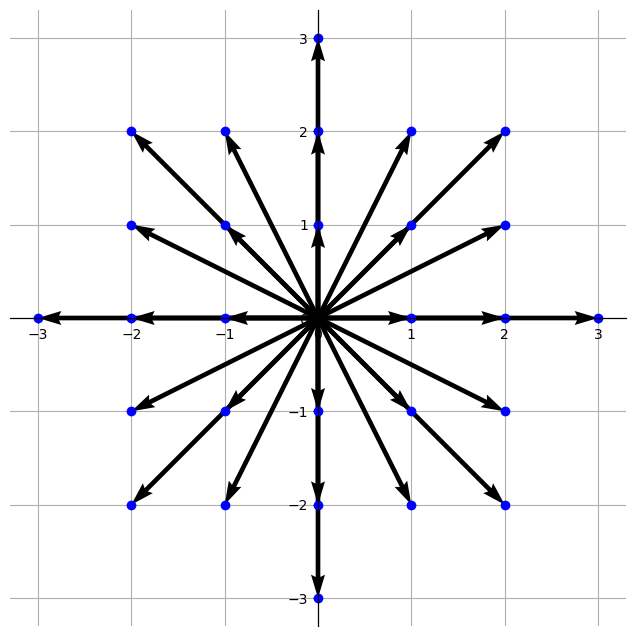

velocity.shape = (28, 2)
velocity_idx.shape = (30, 5)
velocity_grid.shape = (30, 5, 2)


In [118]:
y = d.gen_2D_multi_dtype2(30, 3, 0, 5, False, False, "discrete")

In [119]:
y.keys()

dict_keys(['mu_sequence', 'velocity', 'velocity_idx'])

In [120]:
y["mu_sequence"].shape

(30, 6, 2)

In [121]:
y["mu_sequence"]

array([[[690.54609208, 907.84311467],
        [688.54609208, 905.84311467],
        [688.54609208, 902.84311467],
        [688.54609208, 904.84311467],
        [690.54609208, 905.84311467],
        [691.54609208, 903.84311467]],

       [[320.65721981, 952.05853945],
        [319.65721981, 951.05853945],
        [320.65721981, 949.05853945],
        [318.65721981, 949.05853945],
        [317.65721981, 948.05853945],
        [318.65721981, 948.05853945]],

       [[633.51591792, 944.2719287 ],
        [635.51591792, 944.2719287 ],
        [635.51591792, 946.2719287 ],
        [636.51591792, 944.2719287 ],
        [638.51591792, 943.2719287 ],
        [636.51591792, 945.2719287 ]],

       [[466.63219755, 869.4013432 ],
        [465.63219755, 869.4013432 ],
        [464.63219755, 871.4013432 ],
        [464.63219755, 873.4013432 ],
        [462.63219755, 875.4013432 ],
        [461.63219755, 877.4013432 ]],

       [[798.3238646 , 612.28279997],
        [796.3238646 , 612.28279997],
    

# Visualization

In [122]:
import numpy as np
from scipy import integrate

# Note: t0 is required for the odeint function, though it's not used here.
def lorentz_deriv(X, t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorenz system."""
    x, y, z = X
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

x0 = [1, 1, 1]  # starting vector
t = np.linspace(0, 3, 1000)  # one thousand time steps
x_t = integrate.odeint(lorentz_deriv, x0, t)

In [123]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

N_trajectories = 20


def lorentz_deriv(X, t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorenz system."""
    x, y, z = X
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 4, 1000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data(np.array([]), np.array([]))
        line.set_3d_properties(np.array([]))

        pt.set_data(np.array([]), np.array([]))
        pt.set_3d_properties(np.array([]))
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=True)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('lorentz_attractor.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '15', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-vcodec', 'libx264', '-y', 'lorentz_attractor.mp4']' returned non-zero exit status 255.

In [ ]:
np.random.choice?

In [ ]:
np.take?


In [ ]:
y["velocity"].shape

In [ ]:
z = np.zeros_like(y["velocity"])
z.shape

In [ ]:
z.unsqueeze(1)

In [ ]:
np.random.sample?

In [ ]:
np.random_sample?

In [ ]:
np.random.random_sample()

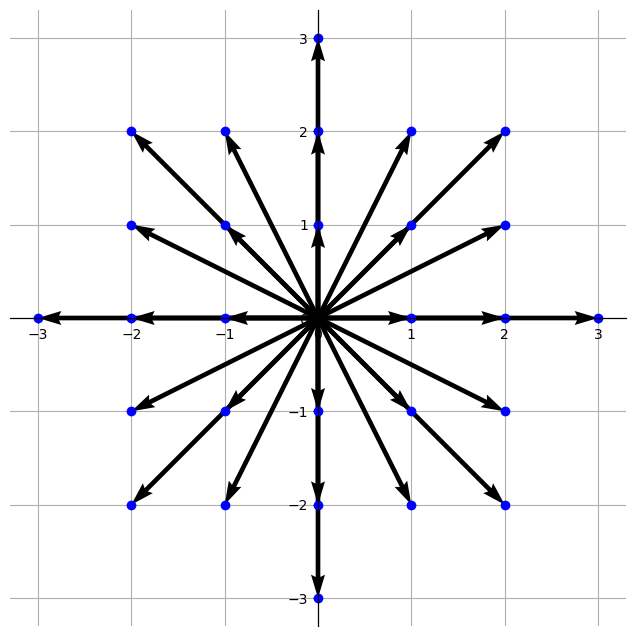

velocity.shape = (28, 2)
velocity_idx.shape = (30, 5)
velocity_grid.shape = (30, 5, 2)


In [125]:
d = data_io.DataGenerator()
y = d.gen_2D_multi_dtype2(30, 3, 0, 5, False, False, "discrete")
y0 = y1 = y2 = None
for i, k in enumerate(y.keys()):
    if i==0: y0 = y[k]
    if i==1: y1 = y[k]
    if i==2: y2 = y[k]

In [126]:
y.keys()

dict_keys(['mu_sequence', 'velocity', 'velocity_idx'])

In [127]:
y0.shape, y1.shape

((30, 6, 2), (30, 5, 2))

In [128]:
y0.max(), y0.min()

(987.112423394037, 1.0092322762446777)

In [129]:
y1.max(), y1.min()

(0.003003003003003003, -0.003003003003003003)

In [172]:
y1[0]

array([[ 0.003003,  0.      ],
       [-0.002002, -0.001001],
       [ 0.002002,  0.001001],
       [ 0.001001, -0.002002],
       [ 0.001001,  0.002002]])

In [173]:
y0[0]

array([[83.04506785, 46.1394831 ],
       [86.04506785, 46.1394831 ],
       [84.04506785, 45.1394831 ],
       [86.04506785, 46.1394831 ],
       [87.04506785, 44.1394831 ],
       [88.04506785, 46.1394831 ]])

In [149]:
origin

array([[0.08304507, 0.08604507, 0.08404507, 0.08604507, 0.08704507,
        0.08804507],
       [0.08304507, 0.04613948, 0.04513948, 0.04613948, 0.04413948,
        0.04613948]])

<Figure size 640x480 with 0 Axes>

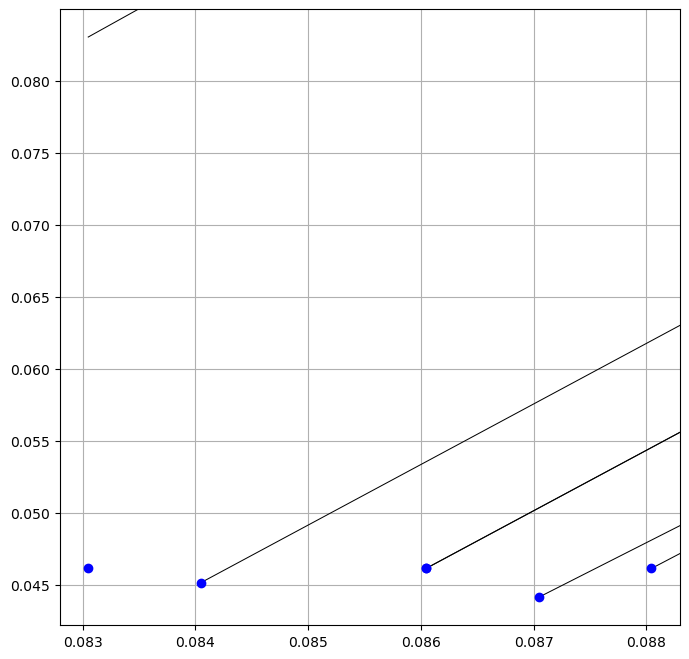

In [154]:
plt.figure()
origin = np.zeros_like(y0[0].T)

X = y0[0][:, 0]/1_000                                                                      
Y = y0[0][:, 1]/1_000
origin[0] = np.insert(X[1:], 0, X[0])
origin[1] = np.insert(Y[1:], 0, X[0])

fig, ax = plt.subplots(figsize=(8, 8))                                                       
ax.quiver(*origin, X, Y, scale=0.1, units="xy", width=0.00005)                                    
ax.scatter(X, Y, c="blue")                                                                   
ax.grid(True)                                                                                
ax.set_axisbelow(True)                                                                       
# ax.set_aspect("equal")                                                                       
# ax.spines["left"].set_position("zero")                                                       
# ax.spines["bottom"].set_position("zero")                                                     
# ax.spines["right"].set_position("zero")                                                      
# ax.spines["top"].set_position("zero")                                                        
plt.show()

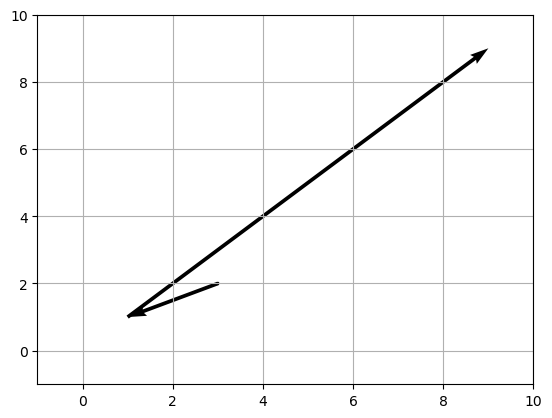

In [171]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[3, 2, 0, 0], [3, 2, 1-3, 1-2], [1,1, 9-1, 9-1]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.grid()
plt.show()

In [161]:
X

(0, 3, 1)

In [162]:
Y

(0, 2, 1)

In [163]:
U

(3, 1, 9)

In [164]:
V

(2, 1, 9)

In [176]:
ops.create_block_diagonal_weights(2,2,2)

TypeError: expected Tensor as element 0 in argument 0, but got tuple

In [189]:
import torch
x = torch.distributions.normal.Normal(0,0.01)
x = x.sample((2,3,4,5))

In [190]:
x.shape

torch.Size([2, 3, 4, 5])

In [191]:
x

tensor([[[[-1.8568e-03, -1.9164e-04,  3.0507e-03,  2.1565e-03, -1.7850e-02],
          [-7.1848e-04,  1.5543e-02,  5.5077e-03,  1.8281e-03, -2.6098e-04],
          [ 4.0320e-03,  1.8454e-02, -1.4729e-02, -2.0263e-02,  1.3141e-02],
          [-1.5536e-03,  7.4260e-03, -1.0671e-02, -1.1682e-04,  1.5903e-02]],

         [[ 1.5896e-02, -1.4607e-02,  1.0196e-03, -1.5209e-02,  7.9353e-04],
          [-1.2036e-02, -7.4486e-03, -8.3842e-03, -9.9309e-03, -1.5641e-02],
          [-1.4816e-02,  8.1237e-03, -6.0345e-03,  5.6840e-03, -1.3187e-02],
          [-1.0789e-02,  1.4729e-03, -1.3207e-02,  2.7065e-02, -5.2587e-03]],

         [[ 1.1059e-02, -8.2831e-03,  7.1388e-03,  1.3462e-02, -2.6166e-03],
          [ 1.8101e-03, -5.2856e-03, -1.4261e-03, -1.1592e-02, -2.2861e-03],
          [ 2.2928e-02, -1.2374e-02, -2.3242e-02,  3.8956e-03, -1.0456e-02],
          [-7.4616e-04, -3.7184e-03, -1.1301e-02, -1.1117e-02, -7.0239e-03]]],


        [[[-1.2346e-02,  2.6968e-03, -1.2720e-02, -3.3789e-03,  1.26

In [192]:
y = torch.unbind(x, dim=0)

In [193]:
len(y)

2

In [194]:
y

(tensor([[[-0.0019, -0.0002,  0.0031,  0.0022, -0.0178],
          [-0.0007,  0.0155,  0.0055,  0.0018, -0.0003],
          [ 0.0040,  0.0185, -0.0147, -0.0203,  0.0131],
          [-0.0016,  0.0074, -0.0107, -0.0001,  0.0159]],
 
         [[ 0.0159, -0.0146,  0.0010, -0.0152,  0.0008],
          [-0.0120, -0.0074, -0.0084, -0.0099, -0.0156],
          [-0.0148,  0.0081, -0.0060,  0.0057, -0.0132],
          [-0.0108,  0.0015, -0.0132,  0.0271, -0.0053]],
 
         [[ 0.0111, -0.0083,  0.0071,  0.0135, -0.0026],
          [ 0.0018, -0.0053, -0.0014, -0.0116, -0.0023],
          [ 0.0229, -0.0124, -0.0232,  0.0039, -0.0105],
          [-0.0007, -0.0037, -0.0113, -0.0111, -0.0070]]]),
 tensor([[[-1.2346e-02,  2.6968e-03, -1.2720e-02, -3.3789e-03,  1.2631e-02],
          [ 1.1743e-02, -2.4894e-03,  1.6059e-02, -1.5668e-04,  1.9573e-02],
          [ 1.3177e-02, -1.2858e-02,  5.8333e-03,  6.4180e-03,  1.5370e-02],
          [ 1.8014e-03, -1.3870e-03, -2.0878e-03,  7.4779e-04,  1.3788e-02]]

In [196]:
torch.block_diag(*y)

RuntimeError: torch.block_diag: Input tensors must have 2 or fewer dimensions. Input 0 has 3 dimensions

In [198]:
print(*y)

tensor([[[-0.0019, -0.0002,  0.0031,  0.0022, -0.0178],
         [-0.0007,  0.0155,  0.0055,  0.0018, -0.0003],
         [ 0.0040,  0.0185, -0.0147, -0.0203,  0.0131],
         [-0.0016,  0.0074, -0.0107, -0.0001,  0.0159]],

        [[ 0.0159, -0.0146,  0.0010, -0.0152,  0.0008],
         [-0.0120, -0.0074, -0.0084, -0.0099, -0.0156],
         [-0.0148,  0.0081, -0.0060,  0.0057, -0.0132],
         [-0.0108,  0.0015, -0.0132,  0.0271, -0.0053]],

        [[ 0.0111, -0.0083,  0.0071,  0.0135, -0.0026],
         [ 0.0018, -0.0053, -0.0014, -0.0116, -0.0023],
         [ 0.0229, -0.0124, -0.0232,  0.0039, -0.0105],
         [-0.0007, -0.0037, -0.0113, -0.0111, -0.0070]]]) tensor([[[-1.2346e-02,  2.6968e-03, -1.2720e-02, -3.3789e-03,  1.2631e-02],
         [ 1.1743e-02, -2.4894e-03,  1.6059e-02, -1.5668e-04,  1.9573e-02],
         [ 1.3177e-02, -1.2858e-02,  5.8333e-03,  6.4180e-03,  1.5370e-02],
         [ 1.8014e-03, -1.3870e-03, -2.0878e-03,  7.4779e-04,  1.3788e-02]],

        [[ 1.958